# Support Vector Machines

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# 1=hasta
# 0=değil

data=pd.read_csv("svm_dataset.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,193,50,16,375,25.9,0.655,24,0
1,11,155,76,28,150,33.3,1.353,51,1
2,3,191,68,15,130,30.9,0.299,34,0
3,3,141,0,0,0,30.0,0.761,27,1
4,4,95,70,32,0,32.1,0.612,24,0


In [3]:
seker_hastalari=data[data.Outcome==1]
saglikli_insanlar=data[data.Outcome==0]


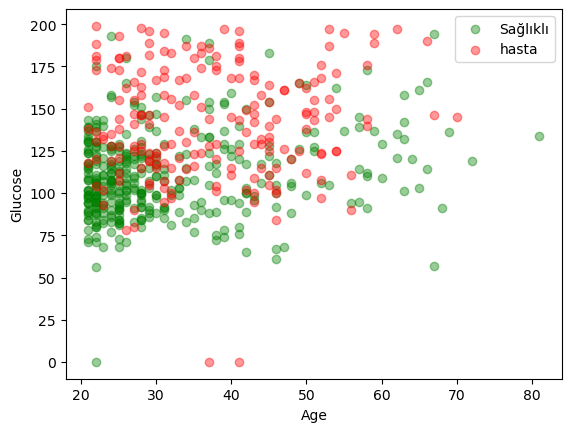

In [4]:
plt.scatter(saglikli_insanlar.Age,saglikli_insanlar.Glucose,color="green",label="Sağlıklı",alpha=0.4)
plt.scatter(seker_hastalari.Age,seker_hastalari.Glucose,color="red",label="hasta",alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()

In [16]:
#x ve y eksenlerini belirliyoruz
y=data.Outcome.values
x_orjinal = data.drop(["Outcome"],axis=1)

#normalizasyon yapıyoruz
x=(x_orjinal-np.min(x_orjinal))/(np.max(x_orjinal)-np.min(x_orjinal))

#önce
print("normalizasyon öncesi")
print(x_orjinal.head())

#sonra
print("Normalizasyon sonrası")
print(x.head())


normalizasyon öncesi
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            1      193             50             16      375  25.9   
1           11      155             76             28      150  33.3   
2            3      191             68             15      130  30.9   
3            3      141              0              0        0  30.0   
4            4       95             70             32        0  32.1   

   DiabetesPedigreeFunction  Age  
0                     0.655   24  
1                     1.353   51  
2                     0.299   34  
3                     0.761   27  
4                     0.612   24  
Normalizasyon sonrası
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.001182  0.228132       0.059102       0.018913  0.443262  0.030615   
1     0.013002  0.183215       0.089835       0.033097  0.177305  0.039362   
2     0.003546  0.225768       0.080378       0.017730  0.153664  0.036525   
3 

In [18]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=3)


In [19]:
#SVM Modelini oluşturuyoruz
svm_model=SVC(random_state=3)
svm_model.fit(x_train,y_train)


SVC(random_state=3)

In [43]:
#SVM ile tahminde bulunacağız
lst=[1,193,50,16,375,25.9,0.655,24]
arr=np.array([lst])


In [44]:
df=pd.DataFrame(arr)
df

,0,1,2,3,4,5,6,7
0,1.0,193.0,50.0,16.0,375.0,25.9,0.655,24.0


In [45]:
print(svm_model.predict(df))

[1]


C:\Users\casper\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [42]:
df.head()

,0,1,2,3,4,5,6,7
0,1.0,170.0,51.0,20.0,100.0,35.6,0.617,20.0


In [37]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,193,50,16,375,25.9,0.655,24,0
1,11,155,76,28,150,33.3,1.353,51,1
2,3,191,68,15,130,30.9,0.299,34,0
3,3,141,0,0,0,30.0,0.761,27,1
4,4,95,70,32,0,32.1,0.612,24,0


In [46]:
#SVM ile tahminde bulunacağız
lst1=[1,193,50,16,375,25.9,0.655,24]
arr=np.array([lst1])

In [52]:
df1=pd.DataFrame(arr)
df1

,0,1,2,3,4,5,6,7
0,1.0,193.0,50.0,16.0,375.0,25.9,0.655,24.0


In [53]:
print(svm_model.predict(df1))

[1]


C:\Users\casper\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [54]:
print("svm accurarcy: %",(svm_model.score(x_test,y_test))*100)

svm accurarcy: % 73.68421052631578
